In [1]:
from PIL import Image
from tqdm import tqdm

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import utils

In [2]:
# data directory
data_dir = "../data/"
images_files = os.listdir(data_dir)
images_files = [i for i in images_files if "Shinkai" in i]
images_files.sort()

images_files

['couple1._Shinkai.jpg', 'couple2._Shinkai.jpg', 'couple3._Shinkai.jpg']

In [3]:
# load images

images = []

for im in images_files:
    img = Image.open(os.path.join(data_dir, im)).convert("RGB")
    print(im)
    print(f"image size : {img.size}")    
    
    images.append(np.array(img))

couple1._Shinkai.jpg
image size : (452, 452)
couple2._Shinkai.jpg
image size : (452, 452)
couple3._Shinkai.jpg
image size : (452, 300)


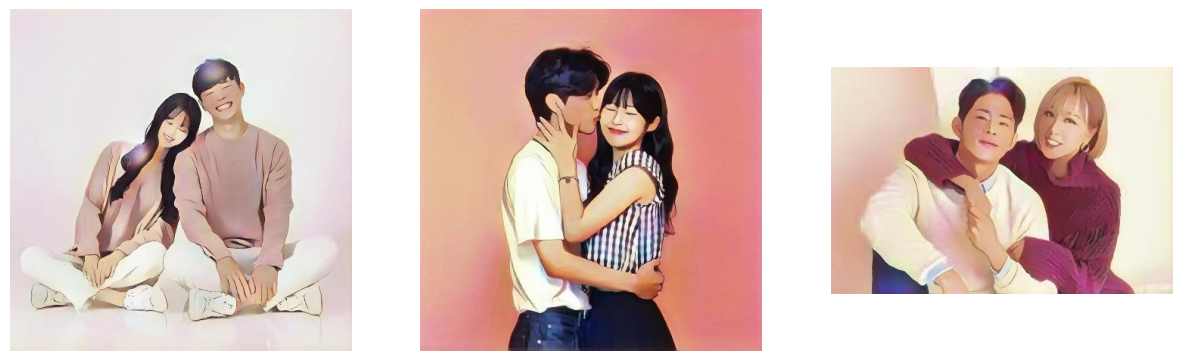

In [4]:
plt.figure(figsize=(5 * len(images), 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis("off")

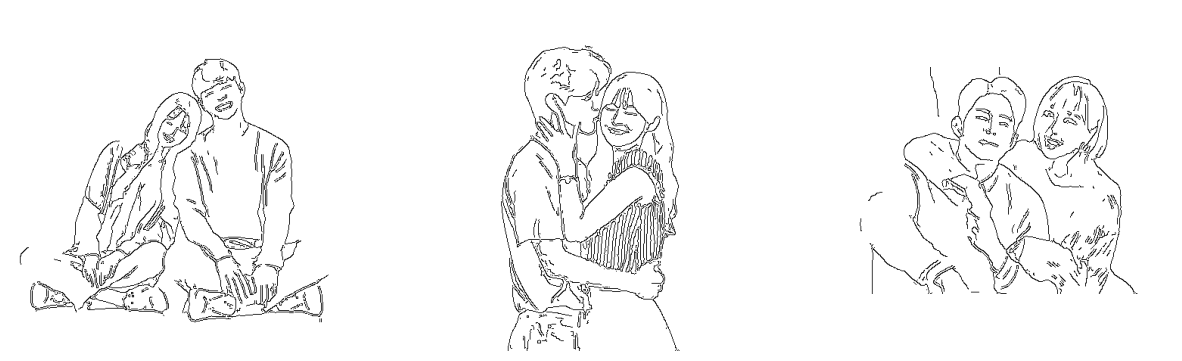

In [5]:
plt.figure(figsize=(5 * len(images), 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(255-utils.canny_detection(images[i], 100, 150), cmap='gray')
    plt.axis("off")

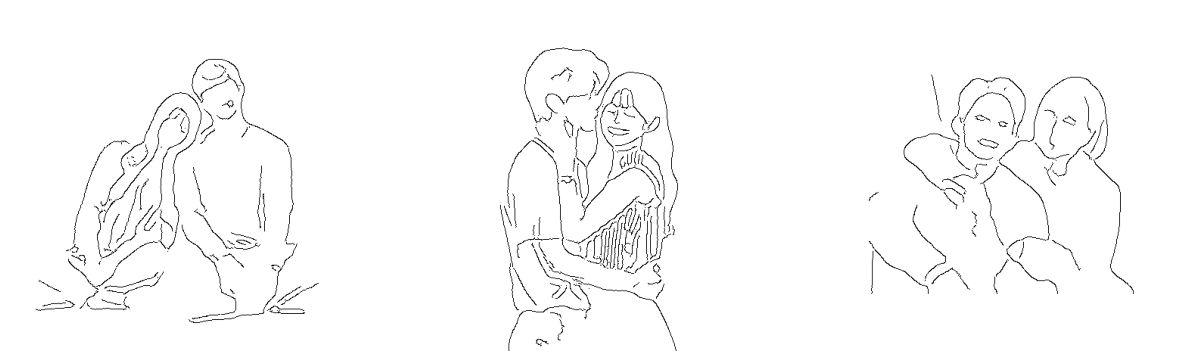

In [6]:
plt.figure(figsize=(5 * len(images), 5))

edges = []
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    smoothing = utils.gaussian_blur(images[i], (25, 15), 3, 3)
    edge = utils.canny_detection(smoothing, 30, 70, apertureSize=3)
    edges.append(edge)
    plt.imshow(255-edge, cmap='gray')
    plt.axis("off")

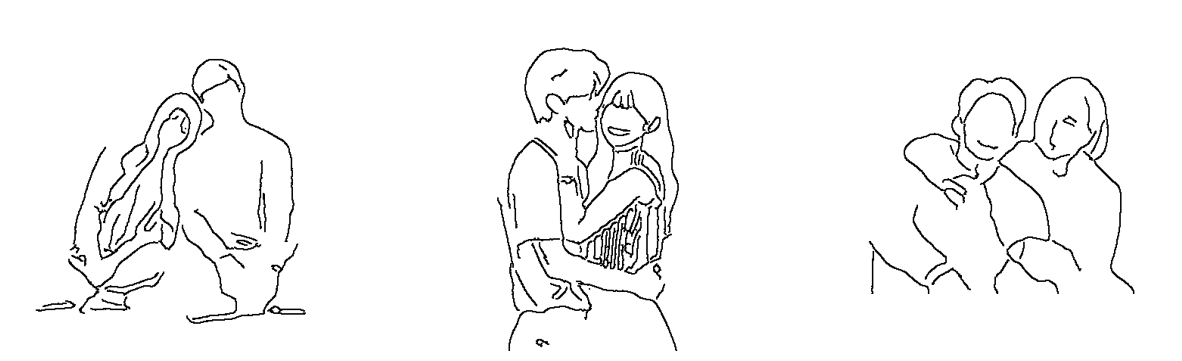

In [7]:
plt.figure(figsize=(5 * len(images), 5))

thick_edges = []
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    smoothing = utils.gaussian_blur(images[i], (25, 15), 3, 3)
    edge = utils.make_edge_thicker(utils.canny_detection(smoothing, 10, 90, apertureSize=3), kernel_size=2)
    thick_edges.append(edge)
    plt.imshow(255-edge, cmap='gray')
    plt.axis("off")

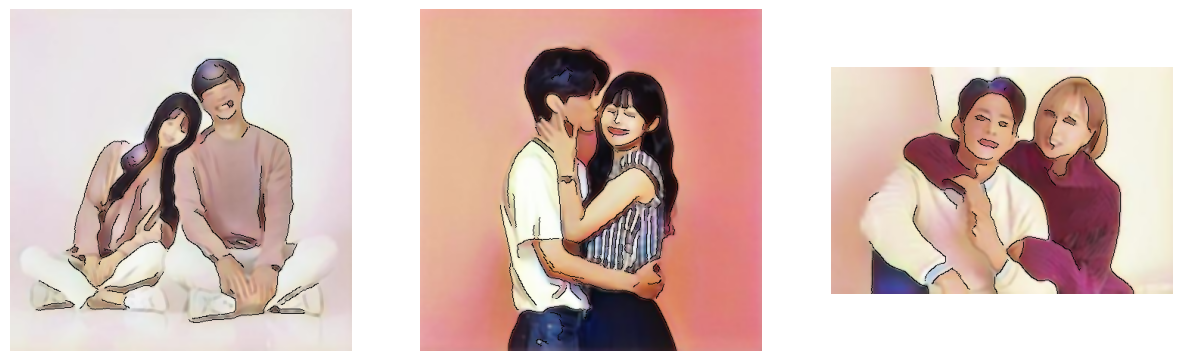

In [8]:
plt.figure(figsize=(5 * len(images), 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    img_with_edge = images[i].copy()
    img_with_edge = utils.gaussian_blur(img_with_edge, (5, 5), 3, 3)
    img_with_edge[edges[i]!=0] = 0
    plt.imshow(img_with_edge, cmap='gray')
    plt.axis("off")

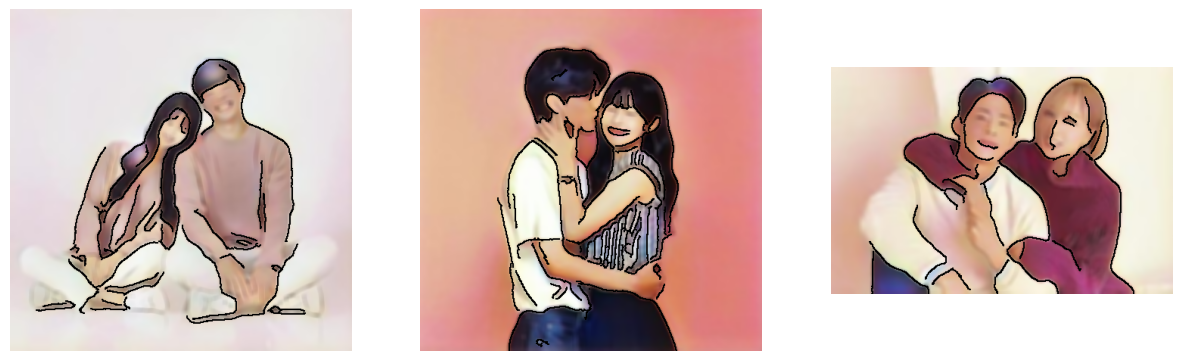

In [9]:
plt.figure(figsize=(5 * len(images), 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    img_with_edge = images[i].copy()
    img_with_edge = utils.gaussian_blur(img_with_edge, (7, 7), 5, 5)
    img_with_edge[thick_edges[i]!=0] = 0
    plt.imshow(img_with_edge, cmap='gray')
    plt.axis("off")

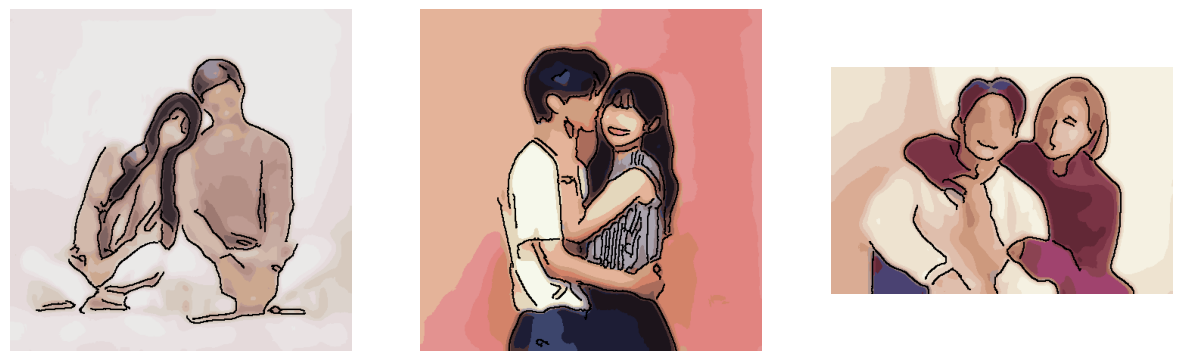

In [10]:
plt.figure(figsize=(5 * len(images), 5))

for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    img_with_edge = images[i].copy()
    img_merged = utils.color_merge(img_with_edge, 15)
    img_merged[thick_edges[i]!=0] = 0
    plt.imshow(img_merged, cmap='gray')
    plt.axis("off")